# Monte Carlo: Como Estimar π e Calcular Integrais

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
plt.rcParams["figure.figsize"] = (6,4)

##  Estimando π (amostragem direta)


In [2]:
def euclidian_dist(x_1:np.array,x_2:np.array,axis:int=1)->np.array:
    return np.sqrt((np.sum((x_1-x_2)**2,axis=1)))

def is_in_circle(points:np.array,radius:float=1,
                 center:np.array=np.zeros([1,2]))->np.array:
    is_in_flag = np.zeros(len(points))
    dist_to_center = euclidian_dist(points,np.concatenate(
        [center for i in range(len(points))]))
    return dist_to_center < radius
    
def plot_points(points_in:np.array,points_out:np.array,
                points:np.array,pi_estimate:float)->None:
    circle1 = plt.Circle((0, 0), 1,fill=False)

    fig, ax = plt.subplots()
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    ax.add_patch(circle1)

    plt.scatter(points_in[:,0], points_in[:,1],c='r',s=1)
    plt.scatter(points_out[:,0], points_out[:,1],c='b',s=1)
    
    plt.title(f"N_total = {len(points)},π = {pi_estimate} ")


Estimativa para pi = 3.1466


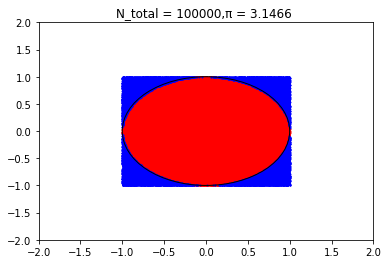

In [3]:
np.random.seed(1111)

n_total = 100000
points = np.random.uniform(-1,1,[n_total,2])
is_in = is_in_circle(points)

points_in = points[is_in]
points_out = points[~is_in]

pi_estimate = 4 * len(points_in)/len(points)

print(f"Estimativa para pi = {pi_estimate}")

plot_points(points_in,points_out,points,pi_estimate)

  0%|          | 0/10000 [00:00<?, ?it/s]

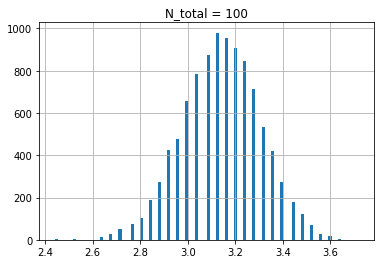

  0%|          | 0/10000 [00:00<?, ?it/s]

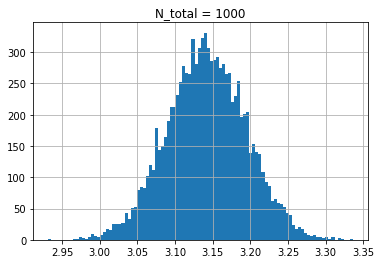

  0%|          | 0/10000 [00:00<?, ?it/s]

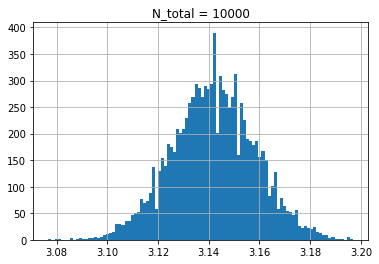

In [4]:
n_amos = 10000


for n_total in [100,1000,10000]:

    pi_estimates = []

    for i in tqdm(range(n_amos)):
        np.random.seed(i)
        points = np.random.uniform(-1,1,[n_total,2])
        is_in = is_in_circle(points)

        points_in = points[is_in]
        points_out = points[~is_in]

        pi_estimate = 4 * len(points_in)/len(points)
        pi_estimates.append(pi_estimate)

    plt.hist(pi_estimates,bins=100)
    plt.grid()
    plt.title(f"N_total = {n_total}")
    plt.show()

## Cálculo de integrais

In [5]:
def f1(points:np.array)->np.array:
    return 1 - (points**2)

def f2(points:np.array)->np.array:
    return np.exp(points)

def f3(points:np.array)->np.array:
    return np.sin(points)**2

def f4(points:np.array)->np.array:
    denominator_1 = (points[:,0] +  points[:,1]) * points[:,2]
    denominator_2 = (points[:,3] +  points[:,4]) * points[:,5]
    denominator_3 = (points[:,6] +  points[:,7]) * points[:,8]
    return 1/(denominator_1+denominator_2+denominator_3)

### Método 1

In [8]:
def monte_carlo_estimation_method1(f_x,x:np.array,y:np.array,rectangle_area:float):
    return (len(y[y<f_x(x)])/len(y)) * rectangle_area

def perform_estimations_method1(f_x,bounds:tuple,f_bounds:tuple,n_amos:int=1000,
                                n_totals:list=[100,1000,10000])->None:
    for n_total in n_totals:

        integral_estimates = []

        for i in tqdm(range(n_amos)):
            np.random.seed(i)
            x = np.random.uniform(bounds[0],bounds[1],[n_total,1])
            y = np.random.uniform(f_bounds[0],f_bounds[1],[n_total,1])
            rectangle_area = (bounds[1]-bounds[0])*(f_bounds[1]-f_bounds[0])
            estimate = monte_carlo_estimation_method1(f_x,x,y,rectangle_area)
            integral_estimates.append(estimate)
        integral_estimates = np.array(integral_estimates)
        plt.hist(integral_estimates,bins=100)
        plt.grid()
        plt.title(f"N_total = {n_total};Sample mean={integral_estimates.mean():.2f};\\
                  Sample std={integral_estimates.std()/(np.sqrt(n_amos)-1):.4f}")
        plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

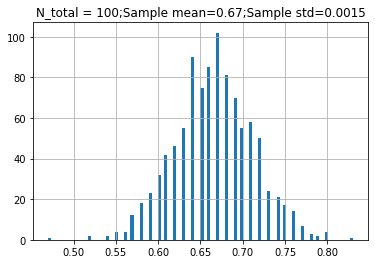

  0%|          | 0/1000 [00:00<?, ?it/s]

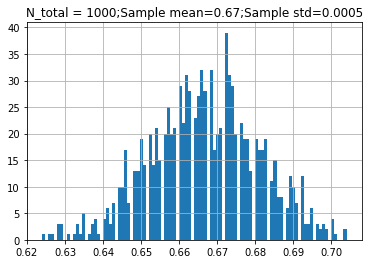

  0%|          | 0/1000 [00:00<?, ?it/s]

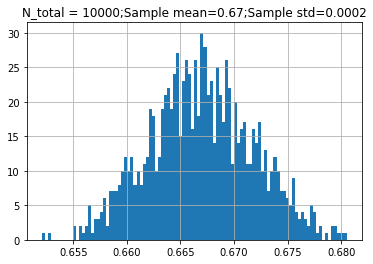

In [9]:
# Função 1
n_amos = 1000
n_totals=[100,1000,10000]
perform_estimations_method1(f1,(0,1),(0,1),n_amos,n_totals=n_totals)

  0%|          | 0/1000 [00:00<?, ?it/s]

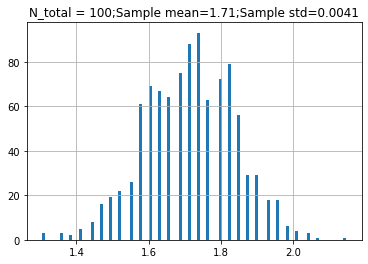

  0%|          | 0/1000 [00:00<?, ?it/s]

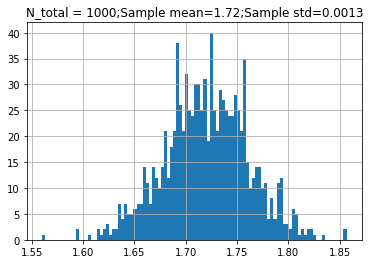

  0%|          | 0/1000 [00:00<?, ?it/s]

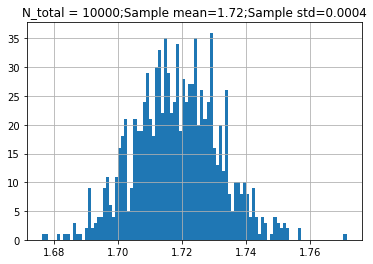

In [10]:
# Função 2
n_amos = 1000
n_totals=[100,1000,10000]
perform_estimations_method1(f2,(0,1),(0,np.exp(1)),n_amos,n_totals=n_totals)

  0%|          | 0/1000 [00:00<?, ?it/s]

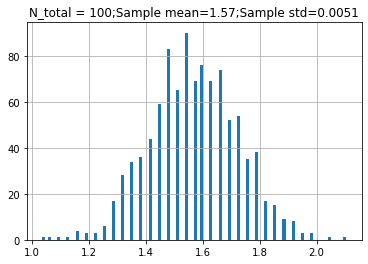

  0%|          | 0/1000 [00:00<?, ?it/s]

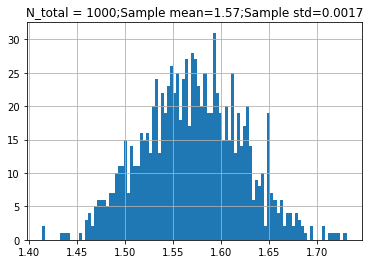

  0%|          | 0/1000 [00:00<?, ?it/s]

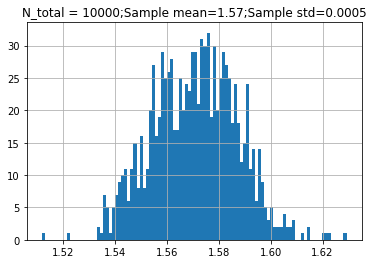

In [11]:
# Função 3
n_amos = 1000
n_totals=[100,1000,10000]
perform_estimations_method1(f3,(0,np.pi),(0,1),n_amos,n_totals=n_totals)

### Método 2

In [21]:
def monte_carlo_estimation_method2(y:np.array,bounds:list)->float:
    bounds_product = np.prod(np.array([upper_bound - lower_bound for
                                       (lower_bound,upper_bound) in bounds]))
    return (bounds_product/len(y)) * np.sum(y)

def perform_estimations_method2(f_x,bounds:list,n_amos:int=1000,
                                n_totals:list=[100,1000,10000])->None:
    for n_total in n_totals:

        integral_estimates = []

        for i in tqdm(range(n_amos)):
            np.random.seed(i)
            points = np.concatenate(
                [np.random.uniform(lower_bound,upper_bound,[n_total,1])
                 for (lower_bound,upper_bound) in bounds],axis=1)
            y = f_x(points)
            estimate = monte_carlo_estimation_method2(y,bounds)
            integral_estimates.append(estimate)
        integral_estimates = np.array(integral_estimates)
        plt.hist(integral_estimates,bins=100)
        plt.grid()
        plt.title(f"N_total = {n_total};Sample mean={integral_estimates.mean():.2f};\\
                  Sample std={integral_estimates.std()/(np.sqrt(n_amos)-1):.4f}")
        plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

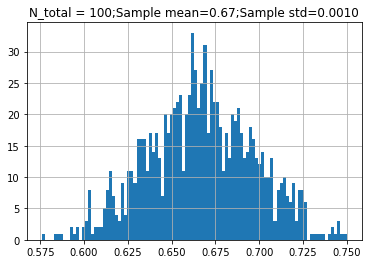

  0%|          | 0/1000 [00:00<?, ?it/s]

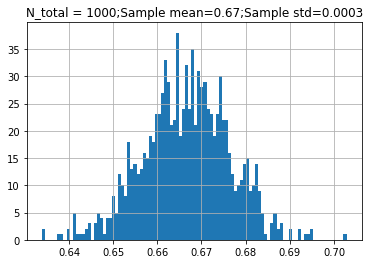

  0%|          | 0/1000 [00:00<?, ?it/s]

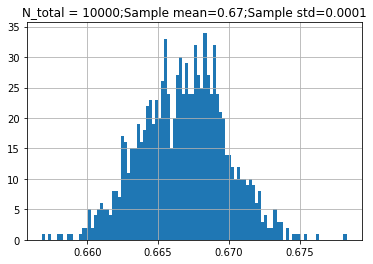

In [ ]:
# Função 1
n_amos = 1000
n_totals=[100,1000,10000]
perform_estimations_method2(f1,[(0,1)],n_amos,n_totals=n_totals)


        

  0%|          | 0/1000 [00:00<?, ?it/s]

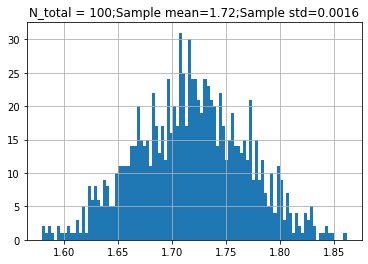

  0%|          | 0/1000 [00:00<?, ?it/s]

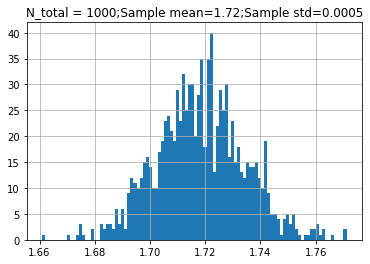

  0%|          | 0/1000 [00:00<?, ?it/s]

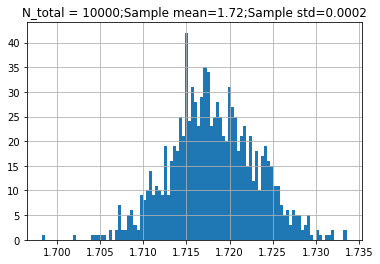

In [16]:
# Função 2
n_amos = 1000
n_totals=[100,1000,10000]
perform_estimations_method2(f2,[(0,1)],n_amos,n_totals=n_totals)



  0%|          | 0/1000 [00:00<?, ?it/s]

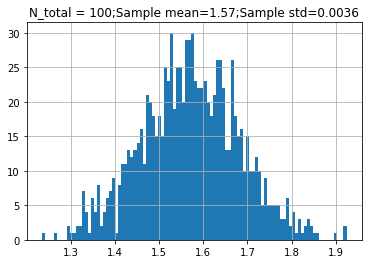

  0%|          | 0/1000 [00:00<?, ?it/s]

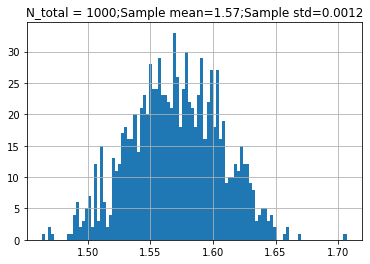

  0%|          | 0/1000 [00:00<?, ?it/s]

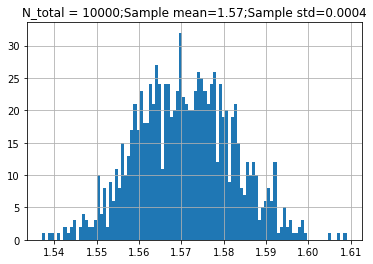

In [17]:
# Função 3
n_amos = 1000
n_totals=[100,1000,10000]
perform_estimations_method2(f3,[(0,np.pi)],n_amos,n_totals=n_totals)



  0%|          | 0/10000 [00:00<?, ?it/s]

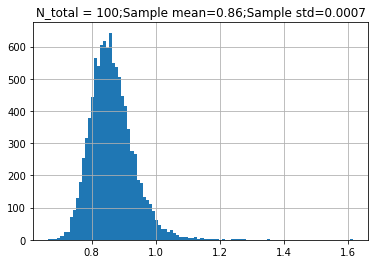

  0%|          | 0/10000 [00:00<?, ?it/s]

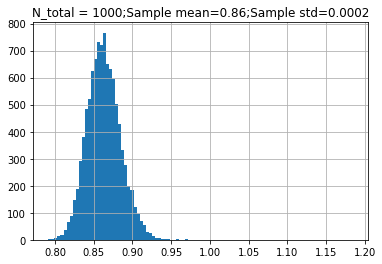

  0%|          | 0/10000 [00:00<?, ?it/s]

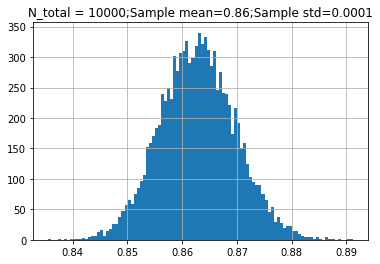

In [18]:
# Função 4
n_amos = 10000
n_totals=[100,1000,10000]
perform_estimations_method2(f4,[(0,1)] * 9,n_amos,n_totals=n_totals)

### Comentários e Observações
* Para cada função, estamos realizando N amostras de tamanho M, e para cada amostra computamos um estimador (no caso alguma das 4 funções definidas). Pelo TCL, a distribuição amostral dos valores estimados aproxima uma distribuição normal, como observado em todas as figuras geradas.
* Como consequência do TCL, podemos utilizar o desvio padrão amostral (Sample std), definido como o desvio padrão da distribuição dividido pela raiz quadrada do número de amostras menos um, para estimar os erros estatísticos.
* De forma geral, os desvios padrão amostrais para os experimentos utilizando o método 2 foram menores que os do método 1, provendo evidência para a superioridade desse método. Além disso, o método 2 fornece uma clara vantagem para o cálculo de integrais múltiplas.
* De modo geral, valores maiores de M resultam em resultados mais próximos do valor analítico da integral. Valores maiores de N também auxiliam na construção de uma distribuição amostral mais representativa. Os resultados em todos os experimentos com valores grandes de M alcançaram valores próximos aos desejados.